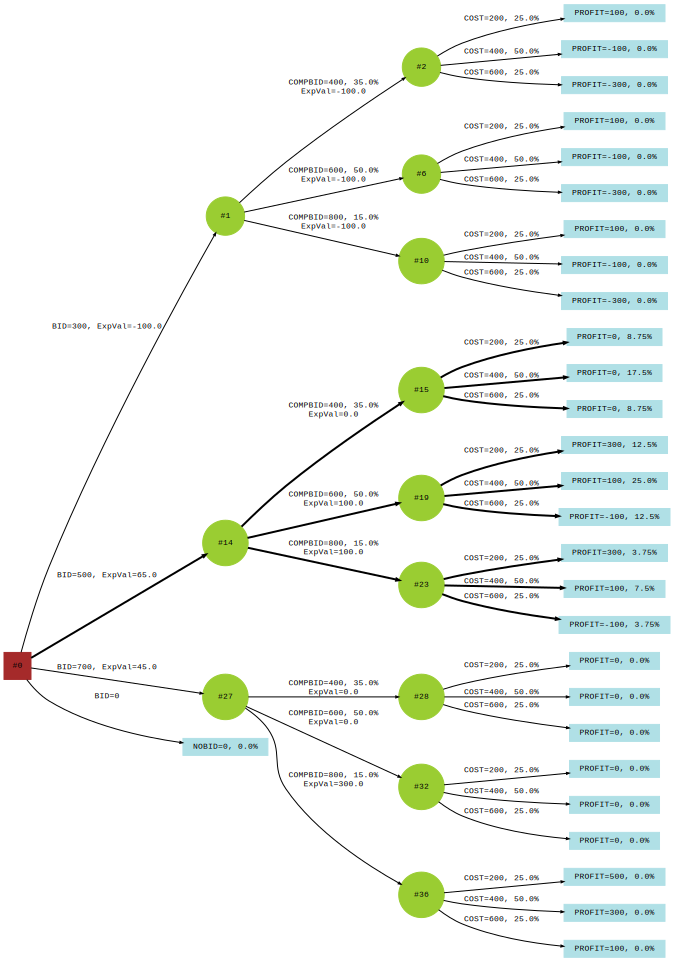

In [1]:
from nodes import Nodes
from decisiontree import DecisionTree

nodes = Nodes()

nodes.decision(
    name="BID",
    branches=[
        (300, "COMPBID"),
        (500, "COMPBID"),
        (700, "COMPBID"),
        (0, "NOBID"),
    ],
    max_=True,
)

nodes.chance(
    name='COMPBID',
    branches=[
        (35.0,  400,  "COST"),
        (50.0,  600,  "COST"),
        (15.0,  800,  "COST")
    ]
)

nodes.chance(
    name='COST',
    branches=[
       (25.0,  200,  "PROFIT"),
       (50.0,  400,  "PROFIT"),
       (25.0,  600,  "PROFIT"),
    ]
)

def profit(BID, COST, COMPBID):
    return (BID - COST) * (1 if BID < COMPBID else 0)

def nobid(**kwargs):
    return 0

nodes.terminal(
    name="PROFIT",
    user_fn=profit,
)


nodes.terminal(
    name="NOBID",
    user_fn=nobid,
)

tree = DecisionTree(
    variables=nodes,
    initial_variable="BID"
)

tree.build()
tree.evaluate()
tree.plot()



In [2]:
>>> b300 = []
>>> b500 = []
>>> b700 = []
>>> probability = list(range(0, 101, 10))
>>> for p in probability:
...     tree._variables['COST']['branches'] = [
...         (p, 200, "PROFIT"),
...         (0, 400, "PROFIT"),
...         (100 - p, 600, "PROFIT"),
...     ]
...     tree.build()
...     tree.evaluate()
...     b300.append(tree.nodes[1]["ExpVal"])
...     b500.append(tree.nodes[14]["ExpVal"])
...     b700.append(tree.nodes[27]["ExpVal"])

In [3]:
>>> b500

[-300.0,
 -300.0,
 -260.0,
 -260.0,
 -220.0,
 -220.0,
 -180.0,
 -180.0,
 -140.0,
 -140.0,
 -100.0,
 -100.0,
 -60.0,
 -60.0,
 -20.0,
 -20.0,
 20.0,
 20.0,
 60.0,
 60.0,
 100.0,
 100.0]

In [4]:
>>> b700

[-65.0, -39.0, -13.0, 13.0, 39.0, 65.0, 91.0, 117.0, 143.0, 169.0, 195.0]

In [5]:
>>> import matplotlib.pyplot as plt
>>> plt.plot(probability, b500, 'o-', color='blue', label='BID=500')
>>> plt.plot(probability, b700, 'o-', color='red', label='BID=700')
>>> plt.legend()
>>> plt.show()

ValueError: x and y must have same first dimension, but have shapes (11,) and (22,)

In [ ]:
from  data import bid 

tree = bid()
tree.variables

In [ ]:
tree

In [ ]:
!pwd